In [1]:
# Import pandas
import pandas as pd
import os
# Load the dataset
# Set path for new working directory
path = "C:/Users/Lee Kah Win/Desktop/"
os.chdir(path)
x = pd.read_csv('countries_geocodes.csv')
x.head()

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra


In [2]:
x2=x[['latitude','longitude']]

# Part 1 - K-Means Clustering

In [3]:
# set up initial centroids
import numpy as np
a = np.array([[  22.5396382 ,   89.68987341],
       [  18.46721708,  -70.39463294],
       [ -30.666387  ,  -59.55665722],
       [  -8.33888431,  155.17703047],
       [ -15.84210807, -164.35100116],
       [  42.36232048,   13.50376869],
       [  -5.4692643 ,   25.89804119],
       [ -82.862752,  135.11725861]])

In [4]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans
# Save new clusters for plot
kmeans = KMeans(n_clusters = 8, max_iter = 600, n_init = 50, init=a)
y_kmeans = kmeans.fit_predict(x2)
print("Sum of squared distances to centroids", kmeans.inertia_)
# as n_cluster increase, ssm decrease, distance with centroid decrease
kmeans.fit(x2)
# Print location of clusters learned by kmeans object
print("Coordinates of cluster centers: ", kmeans.cluster_centers_)
print("Label of each point: ", kmeans.labels_)
print("Number of iterations run: ", kmeans.n_iter_)

Sum of squared distances to centroids 134073.21048595352
Coordinates of cluster centers:  [[  22.5396382    89.68987341]
 [  18.46721708  -70.39463294]
 [ -30.666387    -59.55665722]
 [  -4.19866943  156.29797661]
 [ -15.84210807 -164.35100116]
 [  42.36232048   13.50376869]
 [  -5.4692643    25.89804119]
 [ -82.862752    135.        ]]
Label of each point:  [0 5 5 4 5 6 1 7 1 2 5 1 3 5 5 1 0 0 1 5 5 1 6 1 0 2 5 6 6 2 0 1 0 5 6 6 0
 6 1 5 1 1 6 6 2 0 0 0 1 6 6 6 4 1 5 1 1 5 5 6 5 6 1 1 1 5 1 6 6 5 6 2 5 3
 5 5 1 4 6 6 5 1 5 6 5 5 1 1 1 3 1 5 6 5 1 1 6 1 0 5 5 0 0 0 5 5 5 5 5 1 3
 5 5 0 6 4 5 0 0 5 5 6 6 5 5 5 5 0 5 6 6 0 0 5 5 3 1 5 6 6 1 3 5 5 0 5 1 5
 6 0 6 3 0 5 3 3 1 5 6 4 3 0 3 5 0 0 3 5 1 3 2 2 0 4 5 5 1 0 5 0 6 6 4 5 6
 5 5 6 6 0 1 5 5 3 6 6 2 0 6 5 0 1 6 1 1 1 1 1 6 1 5 6 5 5 5 6 0 0 6 0 3 6
 4 4 1 5 5 0 1 3 3 1 5 1 6 5 0 2 0 3 5 1 0 4 5 6 6 6 5]
Number of iterations run:  2


C:\Users\Lee Kah Win\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=50
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\Lee Kah Win\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=50
  


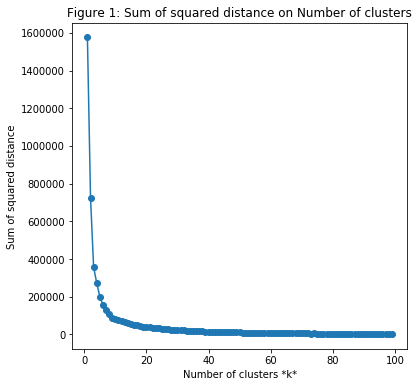

In [5]:
from matplotlib import pyplot as plt
sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x2)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.title('Figure 1: Sum of squared distance on Number of clusters')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [6]:
# longtitude is x
# latitude is y
# 0 = x is latitude

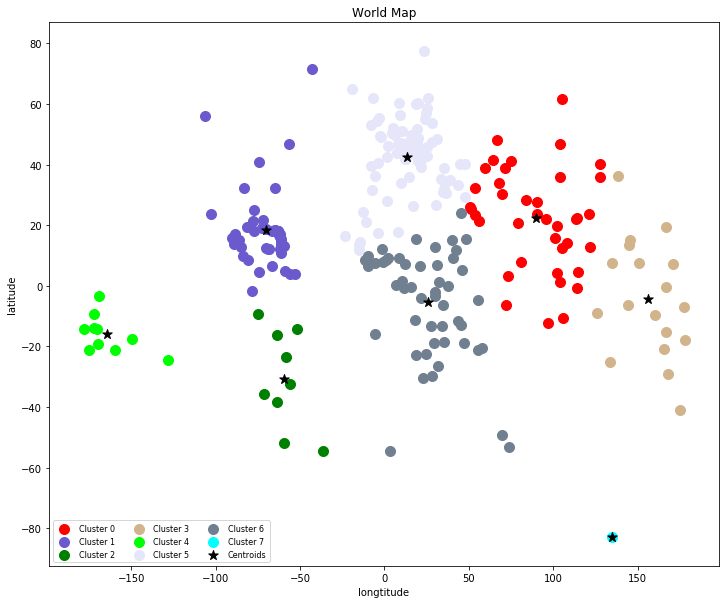

In [7]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize = (12,10))
cluster0 = plt.scatter(x2.iloc[y_kmeans == 0, 1], x2.iloc[y_kmeans == 0, 0], s = 100, \
c = 'red', label = 'Cluster 1')
cluster1 = plt.scatter(x2.iloc[y_kmeans == 1, 1], x2.iloc[y_kmeans == 1, 0], s = 100, \
c= 'slateblue', label = 'Cluster 2')
cluster2 = plt.scatter(x2.iloc[y_kmeans == 2, 1], x2.iloc[y_kmeans == 2, 0], s = 100, \
c = 'green', label = 'Cluster 3')
cluster3 = plt.scatter(x2.iloc[y_kmeans == 3, 1], x2.iloc[y_kmeans == 3, 0], s = 100, \
c = 'tan', label = 'Cluster 1')
cluster4 = plt.scatter(x2.iloc[y_kmeans == 4, 1], x2.iloc[y_kmeans == 4, 0], s = 100, \
c= 'lime', label = 'Cluster 2')
cluster5 = plt.scatter(x2.iloc[y_kmeans == 5, 1], x2.iloc[y_kmeans == 5, 0], s = 100, \
c = 'lavender', label = 'Cluster 3')
cluster6 = plt.scatter(x2.iloc[y_kmeans == 6, 1], x2.iloc[y_kmeans == 6, 0], s = 100, \
c = 'slategrey', label = 'Cluster 3')
cluster7 = plt.scatter(x2.iloc[y_kmeans == 7, 1], x2.iloc[y_kmeans == 7, 0], s = 100, \
c = 'cyan', label = 'Cluster 3')

# Plot the centroids
Centroids = plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 100, \
c = 'black', marker='*', label = 'Centroids')
# Show legend
plt.legend((cluster0, cluster1, cluster2,cluster3, cluster4, cluster5,cluster6,cluster7, Centroids),
('Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6','Cluster 7','Centroids'),
scatterpoints = 1,
loc = 'lower left',
ncol = 3,
fontsize = 8)
# Show plot title
plt.title('World Map')
# Label x-axis
plt.xlabel('longtitude')
# Label y-axis
plt.ylabel('latitude')
# Show plot
plt.show()

In [8]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

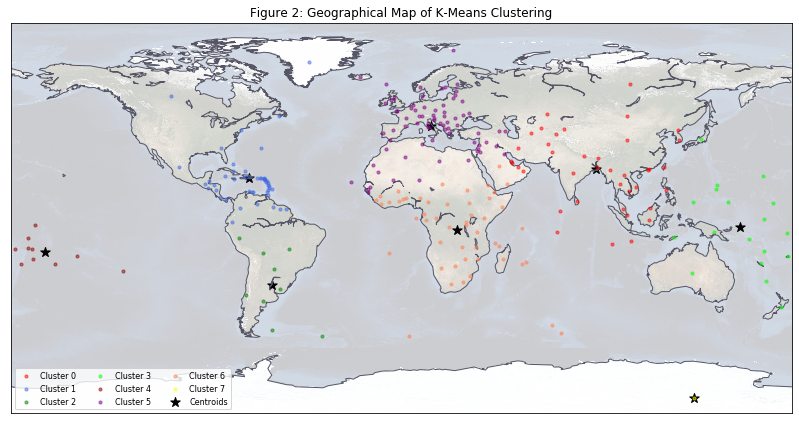

In [9]:
# visualise in geographical map
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lngs = x2['longitude'].tolist()
lats = x2['latitude'].tolist()
lats_c0 = x2.iloc[y_kmeans == 0, 0].tolist()
lngs_c0 = x2.iloc[y_kmeans == 0, 1].tolist()
lats_c1 = x2.iloc[y_kmeans == 1, 0].tolist()
lngs_c1 = x2.iloc[y_kmeans == 1, 1].tolist()
lats_c2 = x2.iloc[y_kmeans == 2, 0].tolist()
lngs_c2 = x2.iloc[y_kmeans == 2, 1].tolist()
lats_c3 = x2.iloc[y_kmeans == 3, 0].tolist()
lngs_c3 = x2.iloc[y_kmeans == 3, 1].tolist()
lats_c4 = x2.iloc[y_kmeans == 4, 0].tolist()
lngs_c4 = x2.iloc[y_kmeans == 4, 1].tolist()
lats_c5 = x2.iloc[y_kmeans == 5, 0].tolist()
lngs_c5 = x2.iloc[y_kmeans == 5, 1].tolist()
lats_c6 = x2.iloc[y_kmeans == 6, 0].tolist()
lngs_c6 = x2.iloc[y_kmeans == 6, 1].tolist()
lats_c7 = x2.iloc[y_kmeans == 7, 0].tolist()
lngs_c7 = x2.iloc[y_kmeans == 7, 1].tolist()
mags = 10

# %matplotlib  # in iPython
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.2)
earth.drawcoastlines(color='#555566', linewidth=1)
cluster0 = plt.scatter(lngs_c0, lats_c0, mags, 
            c='red',alpha=0.5, zorder=10)
cluster1 = plt.scatter(lngs_c1, lats_c1, mags, 
            c='royalblue',alpha=0.5, zorder=10)
cluster2 = plt.scatter(lngs_c2, lats_c2, mags, 
            c='green',alpha=0.5, zorder=10)
cluster3 = plt.scatter(lngs_c3, lats_c3, mags, 
            c='lime',alpha=0.5, zorder=10)
cluster4 = plt.scatter(lngs_c4, lats_c4, mags, 
            c='darkred',alpha=0.5, zorder=10)
cluster5 = plt.scatter(lngs_c5, lats_c5, mags, 
            c='purple',alpha=0.5, zorder=10)
cluster6 = plt.scatter(lngs_c6, lats_c6, mags, 
            c='coral',alpha=0.5, zorder=10)
cluster7 = plt.scatter(lngs_c7, lats_c7, mags, 
            c='yellow',alpha=0.5, zorder=10)
Centroids = plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 100, \
c = 'black', marker='*', label = 'Centroids')
plt.legend((cluster0, cluster1, cluster2,cluster3, cluster4, cluster5,cluster6,cluster7,Centroids),
('Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7','Centroids'),
scatterpoints = 1,
loc = 'lower left',
ncol = 3,
fontsize = 8)
plt.title('Figure 2: Geographical Map of K-Means Clustering')
plt.savefig('Worldmap_kmeans.png', dpi=350)

# Part 2 - Hierrachical Clustering

In [10]:
# 5 affinity: cityblock, euclidean, manhattan, cosine
# 4 linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
from sklearn.cluster import AgglomerativeClustering
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 15, affinity = 'manhattan', linkage = 'complete')
ag.fit(x2)
# Print the cluster label of each data point
print("Label of each point in complete linkage: ", ag.labels_)
y_hc = ag.fit_predict(x2)

Label of each point in complete linkage:  [ 1  2 12  5  2  9  7  8  7  6  1  7  0  2  1  7  1  4  7  2  2  7 12  7
  4  6  2  9 13  6  3  7  4  2 12  9  4  9 11 12  7  7  9  9  6 14  4  4
  7  3  9  9  5  7  2  7  7  1  2 12  2  1  7  7  7  1  7  9  1  2  1  6
  2  0  2  2  7  5  3  9 12  7  2 12  2  2 10  7  7  0  7  2 12 12  7  7
  3  7  4  2  2  4  4  1  1  2  2  1  2  7 14  2  1  1  9  5  1  1  4  2
  1  9 12  1  2  2  2  4  2  3  9  4  3 12  2  0  7 12  3  3 11  0  2  2
 14  2  7  2  9  4  9  0  4  2  0  0  7 12  9  5  0 14  0  2  1  1  0  1
  7  0  6  7  4  5  2  2  7  1  2 14  9  3  5  2  1 12  2  3 12  4  7  2
  2  0  1  9  6 14  9  2  4  7 13  7  7  7 10  7  9  7  2  9  2  2  1  9
  4  1  9  4  0 12  5  5  7  2  1  1  7  0  0  7  2  7  9  2  1  6  1  0
  2  7  4  5 12  1  9  9  2]


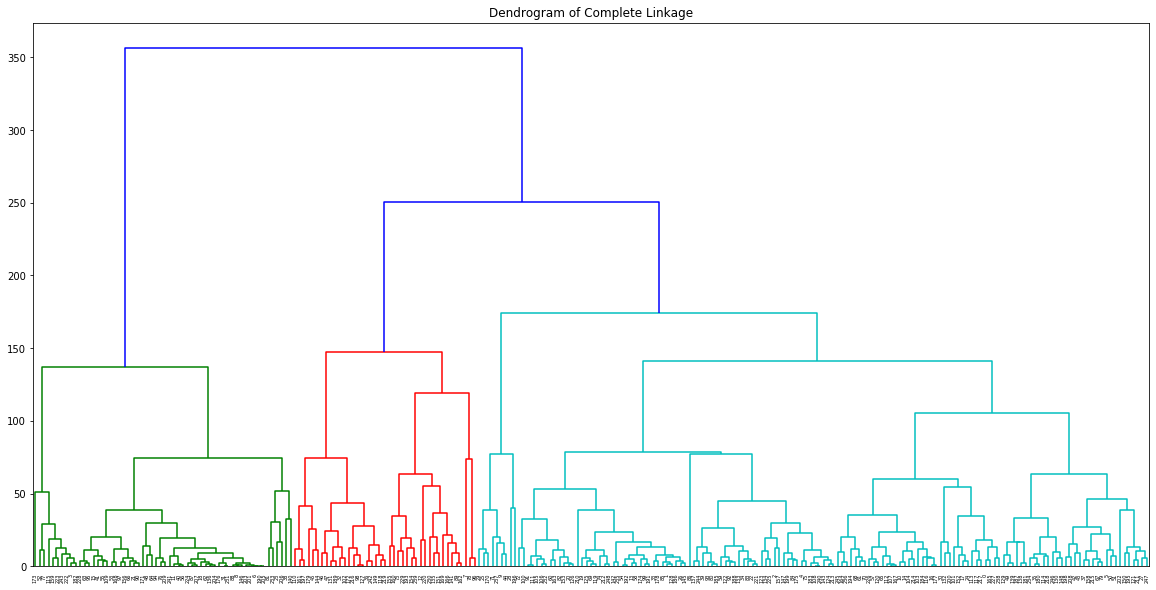

In [11]:
# methods ‘complete’, ‘average’, ‘weighted’ and ‘ward’,
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram of Complete Linkage")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))
# Show plot
plt.show()

In [12]:
lngs = x2['longitude'].tolist()
lats = x2['latitude'].tolist()
lats_c0 = x2.iloc[y_hc == 0, 0].tolist()
lngs_c0 = x2.iloc[y_hc == 0, 1].tolist()
lats_c1 = x2.iloc[y_hc == 1, 0].tolist()
lngs_c1 = x2.iloc[y_hc == 1, 1].tolist()
lats_c2 = x2.iloc[y_hc == 2, 0].tolist()
lngs_c2 = x2.iloc[y_hc == 2, 1].tolist()
lats_c3 = x2.iloc[y_hc == 3, 0].tolist()
lngs_c3 = x2.iloc[y_hc == 3, 1].tolist()
lats_c4 = x2.iloc[y_hc == 4, 0].tolist()
lngs_c4 = x2.iloc[y_hc == 4, 1].tolist()
lats_c5 = x2.iloc[y_hc == 5, 0].tolist()
lngs_c5 = x2.iloc[y_hc == 5, 1].tolist()
lats_c6 = x2.iloc[y_hc == 6, 0].tolist()
lngs_c6 = x2.iloc[y_hc == 6, 1].tolist()
lats_c7 = x2.iloc[y_hc == 7, 0].tolist()
lngs_c7 = x2.iloc[y_hc == 7, 1].tolist()
lats_c8 = x2.iloc[y_hc == 8, 0].tolist()
lngs_c8 = x2.iloc[y_hc == 8, 1].tolist()
lats_c9 = x2.iloc[y_hc == 9, 0].tolist()
lngs_c9 = x2.iloc[y_hc == 9, 1].tolist()
lats_c10 = x2.iloc[y_hc == 10, 0].tolist()
lngs_c10 = x2.iloc[y_hc == 10, 1].tolist()
lats_c11 = x2.iloc[y_hc == 11, 0].tolist()
lngs_c11 = x2.iloc[y_hc == 11, 1].tolist()
lats_c12 = x2.iloc[y_hc == 12, 0].tolist()
lngs_c12 = x2.iloc[y_hc == 12, 1].tolist()
lats_c13 = x2.iloc[y_hc == 13, 0].tolist()
lngs_c13 = x2.iloc[y_hc == 13, 1].tolist()
lats_c14 = x2.iloc[y_hc == 14, 0].tolist()
lngs_c14 = x2.iloc[y_hc == 14, 1].tolist()
mags = 10

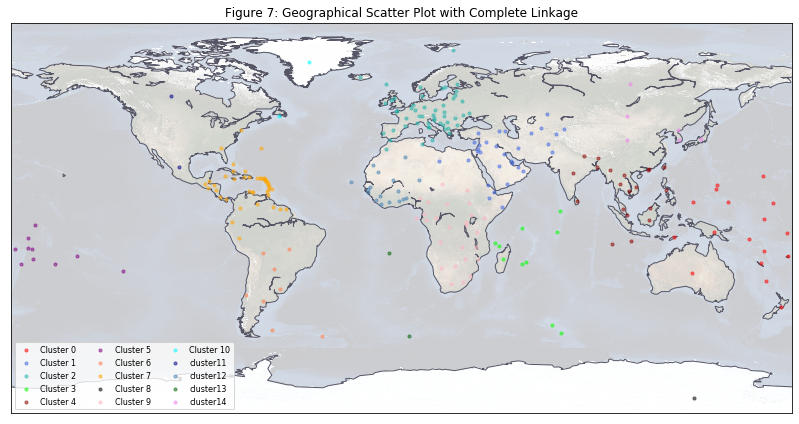

In [13]:
# visualise in geographical map
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.2)
earth.drawcoastlines(color='#555566', linewidth=1)
cluster0 = plt.scatter(lngs_c0, lats_c0, mags, 
            c='red',alpha=0.5, zorder=10, label = 'Cluster 1')
cluster1 = plt.scatter(lngs_c1, lats_c1, mags, 
            c='royalblue',alpha=0.5, zorder=10)
cluster2 = plt.scatter(lngs_c2, lats_c2, mags, 
            c='lightseagreen',alpha=0.5, zorder=10)
cluster3 = plt.scatter(lngs_c3, lats_c3, mags, 
            c='lime',alpha=0.5, zorder=10)
cluster4 = plt.scatter(lngs_c4, lats_c4, mags, 
            c='darkred',alpha=0.5, zorder=10)
cluster5 = plt.scatter(lngs_c5, lats_c5, mags, 
            c='purple',alpha=0.5, zorder=10)
cluster6 = plt.scatter(lngs_c6, lats_c6, mags, 
            c='coral',alpha=0.5, zorder=10)
cluster7 = plt.scatter(lngs_c7, lats_c7, mags, 
            c='orange',alpha=0.5, zorder=10)
cluster8 = plt.scatter(lngs_c8, lats_c8, mags, 
            c='black',alpha=0.5, zorder=10)
cluster9 = plt.scatter(lngs_c9, lats_c9, mags, 
            c='lightpink',alpha=0.5, zorder=10)
cluster10 = plt.scatter(lngs_c10, lats_c10, mags, 
            c='cyan',alpha=0.5, zorder=10)
cluster11 = plt.scatter(lngs_c11, lats_c11, mags, 
            c='darkblue',alpha=0.5, zorder=10)
cluster12 = plt.scatter(lngs_c12, lats_c12, mags, 
            c='steelblue',alpha=0.5, zorder=10)
cluster13 = plt.scatter(lngs_c13, lats_c13, mags, 
            c='darkgreen',alpha=0.5, zorder=10)
cluster14 = plt.scatter(lngs_c14, lats_c14, mags, 
            c='violet',alpha=0.5, zorder=10)
plt.legend((cluster0, cluster1, cluster2,cluster3, cluster4, cluster5,cluster6, cluster7, cluster8, cluster9, cluster10,cluster11, cluster12, cluster13, cluster14),
('Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7', 'Cluster 8', 'Cluster 9','Cluster 10','cluster11', 'cluster12', 'cluster13', 'cluster14'),
scatterpoints = 1,
loc = 'lower left',
ncol = 3,
fontsize = 8)
plt.title('Figure 7: Geographical Scatter Plot with Complete Linkage')
plt.savefig('Worldmap_complete.png', dpi=350)

In [14]:
ag = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
ag.fit(x2)
print("Label of each point in complete linkage: ", ag.labels_)
y_hc = ag.fit_predict(x2)

Label of each point in complete linkage:  [ 5  9 14  7 14  6 12  2 12  8 10 12  0  9 10  1 10  5 12  9 14  1  6  1
  5 12  9  4  4 12  5 12  0  9  6  6  0  6  1 11 12  1  6  6  8 13  0  0
 12  4  6  6  7  1  9  1 12 10  9 11 14 10 12  1 12 10  1  6 10  9 10  8
 14  3  9 14 12  7  2  6 11  1 14  6 14  9  1 12 12  0  1 14 11 11 12  1
  2  1  0  9 14  5  0 10 10 14 14 10  9  1 13 14 10  5  6  7 10  5  0  9
 10  4 11  9 14  9 14  0  9  4  4  0  5 11  9  3 12 11  4  4  1  0  9 14
 13  9 12 14  4  5  4  3  5 14  3  3  1  6  6  7  3 13  0 14 10  5  0 10
  1  0 12 12  0  7  9 14 12 10  9 13  6  4  7  9 10 11  9  4 11  0 12  9
  9  3 10  4  8 13  6 14  5 12  6 12 12 12  1 12  6 12  9  4  9 14 10  6
  0  5  6  0  0  6  7  7 12  9 10  5  1  3  3 12 14  1  6  9 10  8  5  3
  9 12  0  7 11 10  4  4  9]


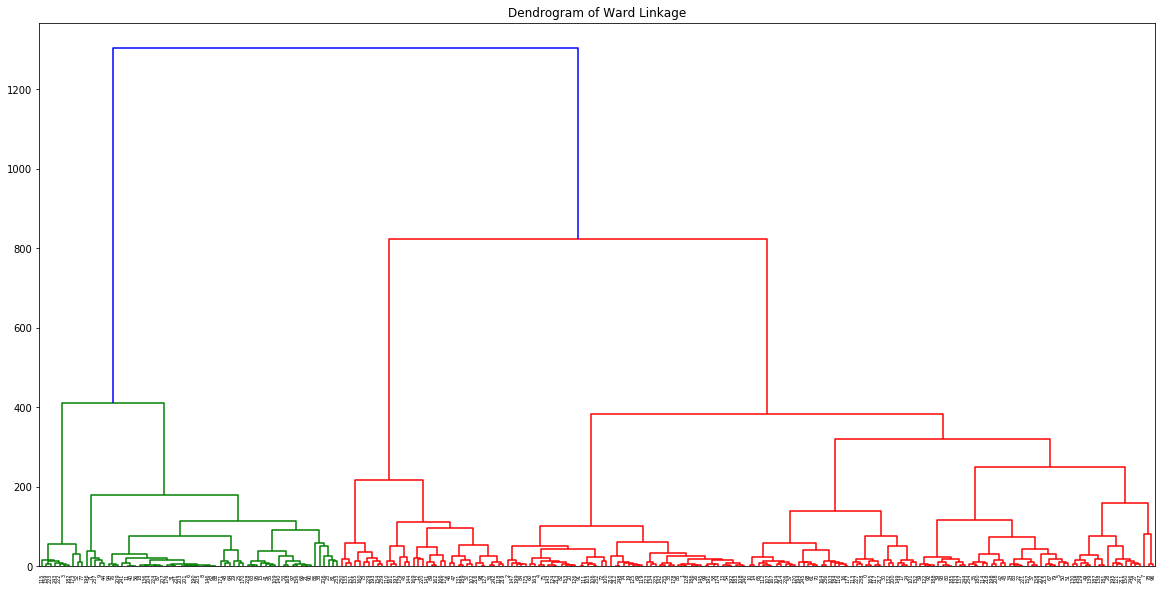

In [15]:
plt.figure(figsize = (20, 10))
plt.title("Dendrogram of Ward Linkage")
dend = sch.dendrogram(sch.linkage(x2, method = 'ward'))
plt.show()

In [16]:
lngs = x2['longitude'].tolist()
lats = x2['latitude'].tolist()
lats_c0 = x2.iloc[y_hc == 0, 0].tolist()
lngs_c0 = x2.iloc[y_hc == 0, 1].tolist()
lats_c1 = x2.iloc[y_hc == 1, 0].tolist()
lngs_c1 = x2.iloc[y_hc == 1, 1].tolist()
lats_c2 = x2.iloc[y_hc == 2, 0].tolist()
lngs_c2 = x2.iloc[y_hc == 2, 1].tolist()
lats_c3 = x2.iloc[y_hc == 3, 0].tolist()
lngs_c3 = x2.iloc[y_hc == 3, 1].tolist()
lats_c4 = x2.iloc[y_hc == 4, 0].tolist()
lngs_c4 = x2.iloc[y_hc == 4, 1].tolist()
lats_c5 = x2.iloc[y_hc == 5, 0].tolist()
lngs_c5 = x2.iloc[y_hc == 5, 1].tolist()
lats_c6 = x2.iloc[y_hc == 6, 0].tolist()
lngs_c6 = x2.iloc[y_hc == 6, 1].tolist()
lats_c7 = x2.iloc[y_hc == 7, 0].tolist()
lngs_c7 = x2.iloc[y_hc == 7, 1].tolist()
lats_c8 = x2.iloc[y_hc == 8, 0].tolist()
lngs_c8 = x2.iloc[y_hc == 8, 1].tolist()
lats_c9 = x2.iloc[y_hc == 9, 0].tolist()
lngs_c9 = x2.iloc[y_hc == 9, 1].tolist()
lats_c10 = x2.iloc[y_hc == 10, 0].tolist()
lngs_c10 = x2.iloc[y_hc == 10, 1].tolist()
lats_c11 = x2.iloc[y_hc == 11, 0].tolist()
lngs_c11 = x2.iloc[y_hc == 11, 1].tolist()
lats_c12 = x2.iloc[y_hc == 12, 0].tolist()
lngs_c12 = x2.iloc[y_hc == 12, 1].tolist()
lats_c13 = x2.iloc[y_hc == 13, 0].tolist()
lngs_c13 = x2.iloc[y_hc == 13, 1].tolist()
lats_c14 = x2.iloc[y_hc == 14, 0].tolist()
lngs_c14 = x2.iloc[y_hc == 14, 1].tolist()
mags = 10

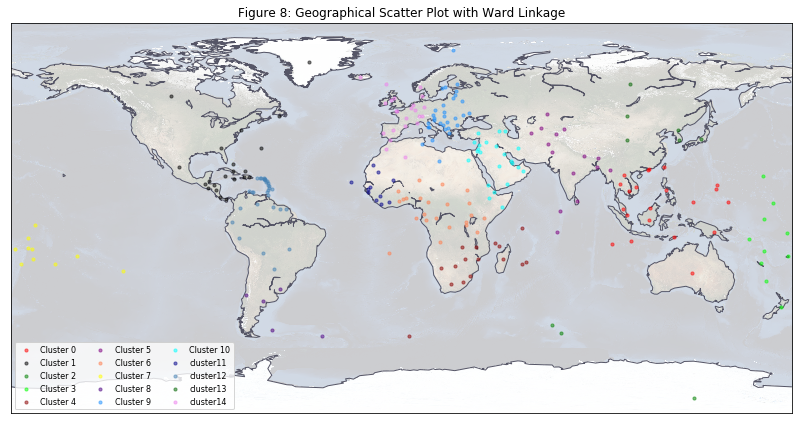

In [17]:
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.2)
earth.drawcoastlines(color='#555566', linewidth=1)
cluster0 = plt.scatter(lngs_c0, lats_c0, mags, 
            c='red',alpha=0.5, zorder=10, label = 'Cluster 1')
cluster1 = plt.scatter(lngs_c1, lats_c1, mags, 
            c='black',alpha=0.5, zorder=10)
cluster2 = plt.scatter(lngs_c2, lats_c2, mags, 
            c='green',alpha=0.5, zorder=10)
cluster3 = plt.scatter(lngs_c3, lats_c3, mags, 
            c='lime',alpha=0.5, zorder=10)
cluster4 = plt.scatter(lngs_c4, lats_c4, mags, 
            c='darkred',alpha=0.5, zorder=10)
cluster5 = plt.scatter(lngs_c5, lats_c5, mags, 
            c='purple',alpha=0.5, zorder=10)
cluster6 = plt.scatter(lngs_c6, lats_c6, mags, 
            c='coral',alpha=0.5, zorder=10)
cluster7 = plt.scatter(lngs_c7, lats_c7, mags, 
            c='yellow',alpha=0.5, zorder=10)
cluster8 = plt.scatter(lngs_c8, lats_c8, mags, 
            c='indigo',alpha=0.5, zorder=10)
cluster9 = plt.scatter(lngs_c9, lats_c9, mags, 
            c='dodgerblue',alpha=0.5, zorder=10)
cluster10 = plt.scatter(lngs_c10, lats_c10, mags, 
            c='cyan',alpha=0.5, zorder=10)
cluster11 = plt.scatter(lngs_c11, lats_c11, mags, 
            c='darkblue',alpha=0.5, zorder=10)
cluster12 = plt.scatter(lngs_c12, lats_c12, mags, 
            c='steelblue',alpha=0.5, zorder=10)
cluster13 = plt.scatter(lngs_c13, lats_c13, mags, 
            c='darkgreen',alpha=0.5, zorder=10)
cluster14 = plt.scatter(lngs_c14, lats_c14, mags, 
            c='violet',alpha=0.5, zorder=10)
plt.legend((cluster0, cluster1, cluster2,cluster3, cluster4, cluster5,cluster6, cluster7, cluster8, cluster9, cluster10,cluster11, cluster12, cluster13, cluster14),
('Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7', 'Cluster 8', 'Cluster 9','Cluster 10','cluster11', 'cluster12', 'cluster13', 'cluster14'),
scatterpoints = 1,
loc = 'lower left',
ncol = 3,
fontsize = 8)
plt.title('Figure 8: Geographical Scatter Plot with Ward Linkage')
plt.savefig('Worldmap_Ward.png', dpi=350)

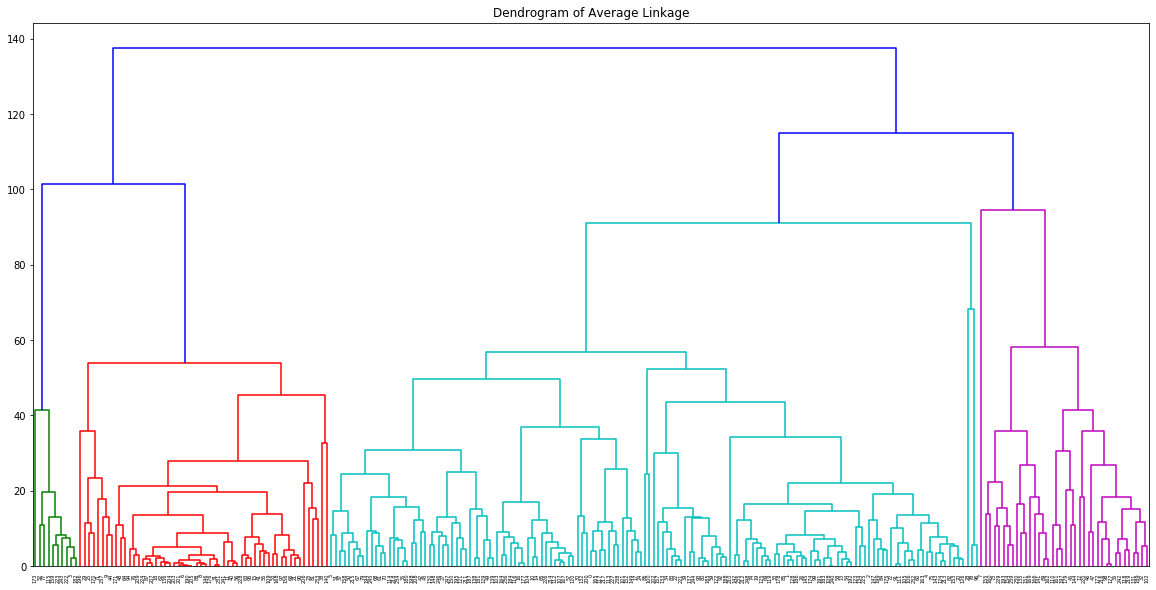

In [18]:
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram of Average Linkage")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'average'))
# Show plot
plt.show()

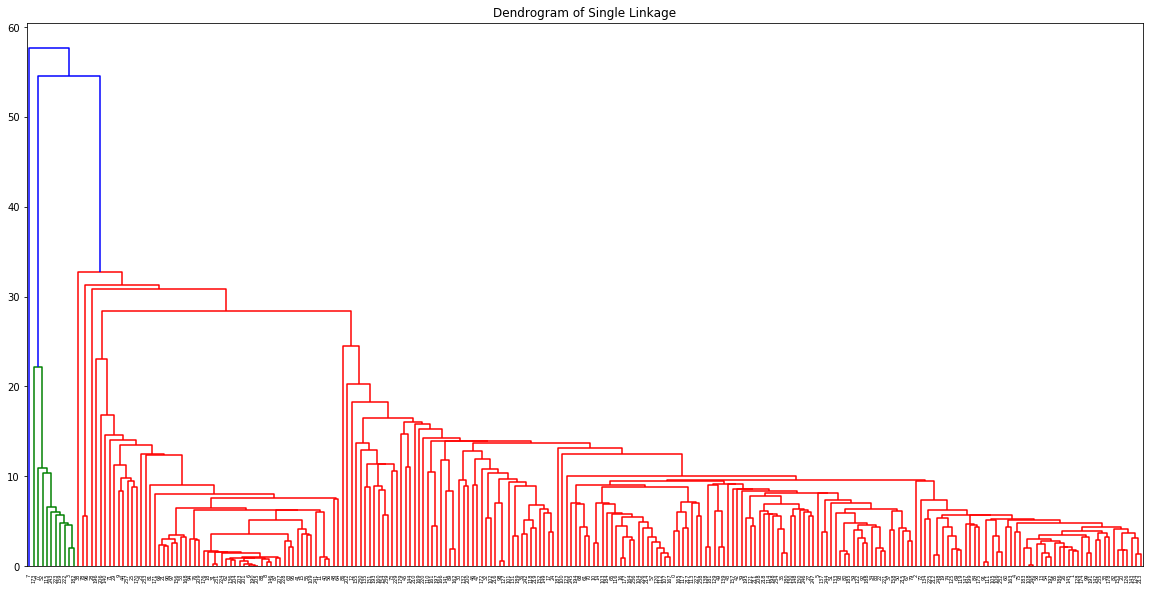

In [19]:
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram of Single Linkage")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'single'))
# Show plot
plt.show()

# Part 3 - Identify the Best Continent Clustering

In [20]:
final_cluster = pd.concat([x, pd.DataFrame(y_kmeans, columns = ['cluster'])], axis = 1)

In [21]:
final_cluster.to_csv(r'countries_clusters.csv', index = False, header = True)